In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("/workspaces/ML-DL/data/liner_regression/salary_vs_experience_15k.csv")

In [3]:
df

,years_experience,annual_salary
0,6.13,45305.39
1,15.74,83553.88
2,3.73,35395.79
3,3.92,38771.60
4,8.23,55545.62
...,...,...
14995,10.00,53347.70
14996,10.01,70841.26
14997,0.81,29733.41
14998,15.92,93341.51


In [4]:
X = df[["years_experience"]]
y = df["annual_salary"]

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.25)

In [7]:
X_train

,years_experience
7410,18.56
10894,10.79
1934,4.33
11539,10.53
2952,10.23
...,...
5191,2.48
13418,0.12
5390,13.08
860,7.27


In [8]:
from sklearn.preprocessing import StandardScaler


In [9]:
scalar = StandardScaler()

In [10]:
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [11]:
X_train

array([[ 1.47048263],
       [ 0.12988586],
       [-0.98469008],
       ...,
       [ 0.52499096],
       [-0.47743725],
       [-1.16757716]], shape=(11250, 1))

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
regression = LinearRegression()

In [14]:
regression.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [16]:
print("cofficient", regression.coef_)
print("intercept", regression.intercept_)

cofficient [20204.25381522]
intercept 59957.956384888894


In [17]:
y_pred = regression.predict(X_test)

In [18]:
y_pred

array([82696.07971864, 34799.25797702, 92003.5407121 , ...,
       41666.56065759, 72342.83659109, 32219.66204625], shape=(3750,))

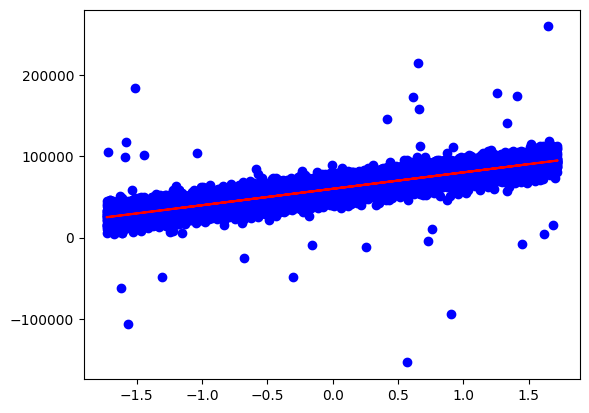

In [24]:
plt.scatter(X_train,y_train,color = "blue")
plt.plot(X_train,regression.predict(X_train),color = "red")

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, adjusted_rand_score

In [26]:
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)
rmse = np.sqrt(MSE)
adjusted_r2 = 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print("Mean Absolute Error:", MAE)
print("Mean Squared Error:", MSE)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", R2)
print("Adjusted R^2 Score:", adjusted_r2)

Mean Absolute Error: 6761.2244558772245
Mean Squared Error: 98695830.59089486
Root Mean Squared Error: 9934.577524529912
R^2 Score: 0.8008000221619371
Adjusted R^2 Score: 0.8007468738220657


In [27]:
regression.predict(scalar.transform([[6.13]]))

/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([46337.72085655])

In [ ]:
45305.39